First 5 rows of the data:
   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  .

Enter a number between 0 and 1 for test split:  0.2
Enter number of nearest neighbours (k) for KNN Regressor:  5



KNN Regression Results (for learning purpose):
MAE: 0.08914736739881217
MSE: 0.05061578858481358
R2 Score: 0.7691109903656591

Logistic Regression Classification Metrics:
Confusion Matrix:
 [[82  0]
 [ 2 30]]
Precision: 1.0
Recall: 0.9375
Accuracy: 0.9824561403508771
ROC-AUC Score: 0.9954268292682927


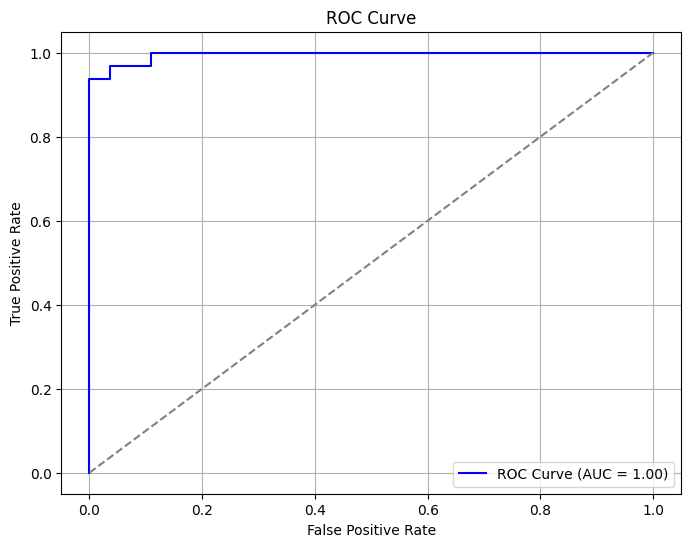


Threshold tuning:
Threshold: 0.3 | Precision: 0.9091 | Recall: 0.9375
Threshold: 0.5 | Precision: 1.0000 | Recall: 0.9375
Threshold: 0.7 | Precision: 1.0000 | Recall: 0.9375


In [30]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (mean_absolute_error, mean_squared_error, r2_score,confusion_matrix, precision_score, recall_score,
      accuracy_score, roc_auc_score, roc_curve)


data = pd.read_csv("breastcancer.csv")
data["diagnosis"] = data["diagnosis"].map({"M": 1, "B": 0})
data = data.drop(columns=["id", "Unnamed: 32"], errors='ignore')
print(data.head())

X = data.iloc[:, 1:-1]   
y_reg = data["diagnosis"]

test_split = float(input("Enter a number between 0 and 1 for test split: "))
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=test_split)

k = int(input("Enter number of nearest neighbours (k) for KNN Regressor: "))
model = KNeighborsRegressor(n_neighbors=k, weights='distance')
model.fit(X_train_reg, y_train_reg)
pred = model.predict(X_test_reg)

print("\nKNN Regression Results (for learning purpose):")
print("MAE:", mean_absolute_error(y_test_reg, pred))
print("MSE:", mean_squared_error(y_test_reg, pred))
print("R2 Score:", r2_score(y_test_reg, pred))

X_class = data.iloc[:, 1:]   
y_class = data["diagnosis"]  

X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=test_split)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)
y_prob = log_model.predict_proba(X_test_scaled)[:, 1]  
y_pred = (y_prob >= 0.5).astype(int)

print("\nLogistic Regression Classification Metrics:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_prob):.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# -----------------------------
# 5. Threshold tuning
# -----------------------------
print("\nThreshold tuning:")
for thresh in [0.3, 0.5, 0.7]:
    y_thresh_pred = (y_prob >= thresh).astype(int)
    prec = precision_score(y_test, y_thresh_pred)
    rec = recall_score(y_test, y_thresh_pred)
    print(f"Threshold: {thresh:.1f} | Precision: {prec:.4f} | Recall: {rec:.4f}")
